In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint
from scipy import stats
import itertools

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

from mlxtend.classifier import StackingClassifier

# grid search
from sklearn.model_selection import GridSearchCV

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

from sklearn import datasets

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

the class-probabilities of the first-level classifiers can be used to train the meta-classifier 
(2nd-level classifier) by setting __use_probas=True__

    If average_probas=True, the probabilities of the level-1 classifiers are averaged, 
    if average_probas=False, the probabilities are stacked (recommended). 

For example, in a 3-class setting with 2 level-1 classifiers, 
these classifiers may make the following "probability" predictions for 1 training sample:

    classifier 1: [0.2, 0.5, 0.3]
    classifier 2: [0.3, 0.4, 0.4]

If average_probas=True, the meta-features would be:

[0.25, 0.45, 0.35]

In contrast, using average_probas=False results in k features 
where, k = [n_classes * n_classifiers], by stacking these level-1 probabilities:

[0.2, 0.5, 0.3, 0.3, 0.4, 0.4]

In [2]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [9]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = GaussianNB()

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,
                          average_probas=True,
                          use_features_in_secondary=False,
                          store_train_meta_features=True,
                          meta_classifier=lr)

In [10]:
print('3-fold cross validation:\n')

3-fold cross validation:



In [11]:
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = cross_val_score(clf, 
                             X, 
                             y, 
                             cv=3, 
                             scoring='accuracy')
    
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.02) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.94 (+/- 0.03) [StackingClassifier]


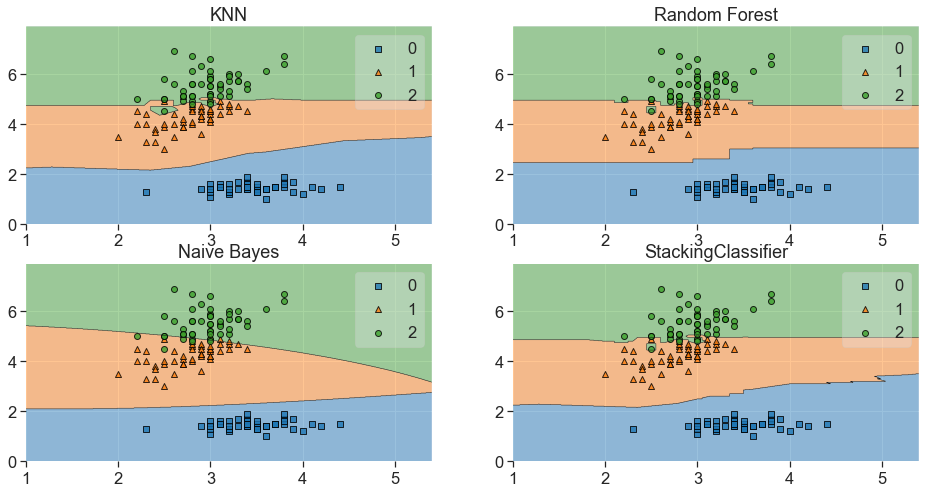

In [13]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

In [12]:
print('Number of samples in the meta model : {}'.format(len(sclf.train_meta_features_)))
sclf.train_meta_features_[:5]


AttributeError: 'StackingClassifier' object has no attribute 'train_meta_features_'

In [36]:
# predict
y_pred = sclf.predict(X)

print('The accuracy score is : {}'.format(metrics.accuracy_score(y, y_pred)))
print('The Confusion matrix  : \n {}'.format(metrics.confusion_matrix(y, y_pred)))
print('The classification report  : \n {}'.format(metrics.classification_report(y, y_pred)))

The accuracy score is : 0.9866666666666667
The Confusion matrix  : 
 [[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
The classification report  : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

